In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [2]:
eda_data = pd.read_csv('train.csv', index_col="PassengerId")
eda_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [8]:
eda_data.info()   # информация об имеющихся данных
eda_data.isnull().sum() # для удобства выведем количество пустых ячеек в каждом столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.2+ MB


Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [4]:
## Удалим столбцы с большим количеством пропусков и не содержащие ценной для наших исследований информации
useless_columns = ['Name', 'Ticket', 'Cabin']
train = eda_data.drop(columns = useless_columns)

In [14]:
# inputting - заполнение пропущенных значений

def impute_data(df):
    df_copy = df.copy() # копируем, чтобы не изменять оригинал
    
    # заполняем пропущенные данные для категориальных переменных
    categorical_vars = list(df_copy.select_dtypes(include=['object']).columns.values)
    for col in categorical_vars:# можно рассмореть только столбец 'Embarked', так как других столбцов с пропущенными категориальными переменными нет
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna('unknown', inplace = True)# заполняем пропущенные данные "unknown", чтобы не увеличивать ни одно из значений категориальной переменной и не искажать статистику
            
    
    # заполняем пропущенные данные для количественных переменных
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    for col in numerical_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace = True) # заполняем пропуски медианой
    
    
    return df_copy

train_full = impute_data(train)

# Data exploration

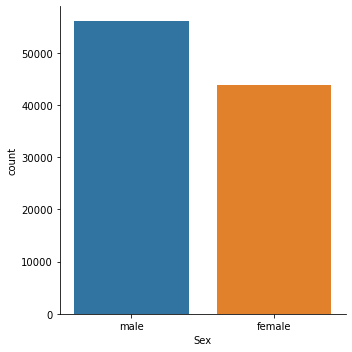

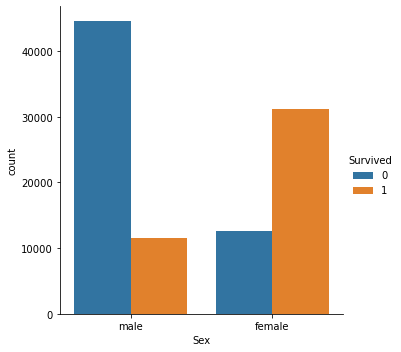

In [12]:
sns.catplot(x='Sex', data = train_full, kind = 'count')
sns.catplot(x ='Sex', data = train_full, hue = 'Survived', kind = 'count')
#plt.show()

<AxesSubplot:xlabel='count', ylabel='Pclass'>

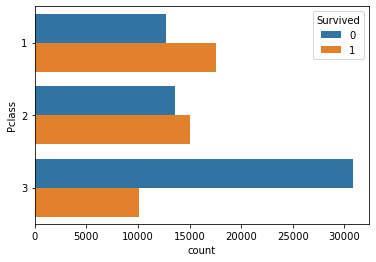

In [15]:
sns.countplot(y='Pclass', hue = 'Survived', data = train_full)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

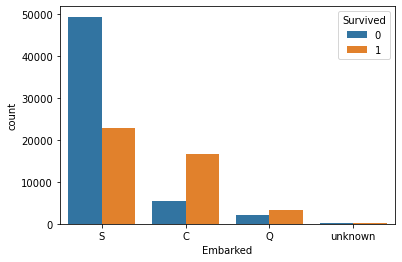

In [16]:
sns.countplot(x='Embarked', hue = 'Survived', data = train_full)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

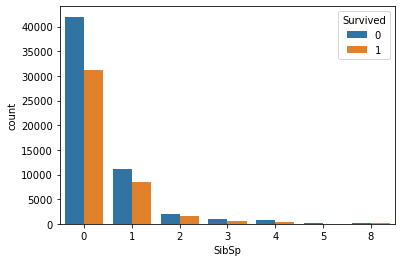

In [17]:
sns.countplot(x='SibSp', hue = 'Survived', data = train_full)

<AxesSubplot:xlabel='Parch', ylabel='count'>

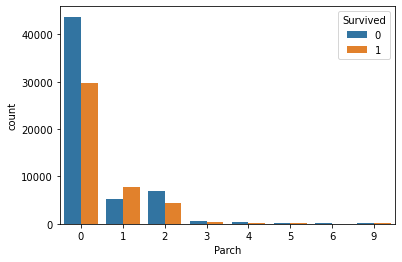

In [18]:
sns.countplot(x='Parch', hue = 'Survived', data = train_full)

 средний возраст пассажиров 38.37668999999998 
 самый молодой пассажир 0.08 лет 
 самый большой возраст среди пассажиров 87.0
 медиана возраста 39.0
 среднеквадратичное отклонение 18.00995614528624


<AxesSubplot:xlabel='Age', ylabel='Count'>

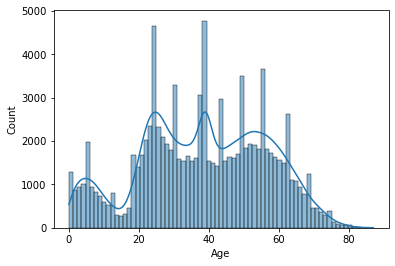

In [22]:
# найдём меры центральной тенденции и изобразим респределение даных возраста
mean_age = train_full['Age'].mean()
min_age = train_full['Age'].min()
max_age = train_full['Age'].max()
median_age = train_full['Age'].median()
std_age = train_full['Age'].std()
print(f' средний возраст пассажиров {mean_age} \n самый молодой пассажир {min_age} лет \
\n самый большой возраст среди пассажиров {max_age}\
\n медиана возраста {median_age}\
\n среднеквадратичное отклонение {std_age}')
sns.histplot(train_full['Age'], kde = True)

 средняя цена билетов 43.903241499999936 
 самая низкая цена билета 0.68 
 самая высокая цена билета 744.66
 медиана цены билета 24.46
 среднеквадратичное отклонение цены 69.54582688906741


<AxesSubplot:xlabel='Fare', ylabel='Count'>

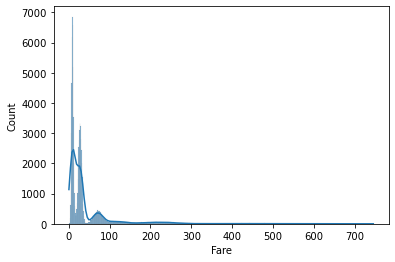

In [24]:
# найдём меры центральной тенденции и изобразим распределение данных цены
mean_fare = train_full['Fare'].mean()
max_fare = train_full['Fare'].max()
min_fare = train_full['Fare'].min()
median_fare = train_full['Fare'].median()
std_fare = train_full['Fare'].std()
print(f' средняя цена билетов {mean_fare} \n самая низкая цена билета {min_fare} \
\n самая высокая цена билета {max_fare}\
\n медиана цены билета {median_fare}\
\n среднеквадратичное отклонение цены {std_fare}')
sns.histplot(train_full['Fare'], kde = True)

# Summary